### web crawling
- 1. requests : json (API 방식, 동적페이지, URL 변경없이 데이터를 수정 및 추가)
- 2. requests : html (정적페이지, URL 변경으로 데이터를 수정 및 추가)
- 3. selenium : web browser(파이썬 객체, 1번과 2번을 사용하지 못할때 사용

### 1. 네이버 주식 데이터 크롤링
- 코스피 데이터 수집
- 코스닥 데이터 수집
- USD환율 데이터 수집
- 그래프 그리기
- 상관계수를 확인

#### 크롤링 절차
- 1. 웹서비스 분석 : URL 분석하기
- 2. request, response 하기 :json 얻기
- 3. 문자열 json 데이터를 dict로 변경(파싱, 형변환) 후 데이터프레임으로 생성

In [89]:
import requests

In [90]:
# 웹 서비스 분석 : url
url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code=KOSPI&pageSize=20&page=1"

In [91]:
# 2. request, response : json(str)
respones = requests.get(url) # get 대신 post면 post를 사용하면됨
respones

<Response [200]>

In [92]:
# 3. str 데이터를 dict로 파싱 후 데이터 프레임으로 만들기
datas = respones.json()['result']['siseList'] # jsom 명령어로 딕셔너리로 변경
type(datas), len(datas)

(list, 20)

In [93]:
kospi_df = pd.DataFrame(datas)
kospi_df.tail()

,cd,dt,ncv,cv,cr,ov,hv,lv
15,KOSPI,20200130,2148.00,-37.28,-1.71,2181.54,2187.45,2139.72
16,KOSPI,20200129,2185.28,8.56,0.39,2188.18,2195.45,2172.33
17,KOSPI,20200128,2176.72,-69.41,-3.09,2192.22,2199.93,2166.23
18,KOSPI,20200123,2246.13,-21.12,-0.93,2254.54,2260.63,2241.94
19,KOSPI,20200122,2267.25,27.56,1.23,2238.53,2269.27,2235.13


In [94]:
### KOSDAQ 크롤링

In [95]:
# 1. 웹페이지 분석 : URL
url_kosdaq = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSDAQ&pageSize=20&page=1"

In [96]:
# 2. request, response : json
respones_kosdaq = requests.get(url_kosdaq)

In [97]:
# 3. json(str) -> dict -> DataFrame
datas_kosdaq = respones_kosdaq.json()['result']['siseList']

In [98]:
kosdaq_df = pd.DataFrame(datas_kosdaq)
kosdaq_df.tail()

,cd,dt,ncv,cv,cr,ov,hv,lv
15,KOSDAQ,20200130,656.39,-13.79,-2.06,670.65,673.17,652.42
16,KOSDAQ,20200129,670.18,5.48,0.82,671.08,671.98,664.09
17,KOSDAQ,20200128,664.70,-20.87,-3.04,660.79,668.22,658.78
18,KOSDAQ,20200123,685.57,-2.68,-0.39,685.94,687.71,683.52
19,KOSDAQ,20200122,688.25,11.73,1.73,677.05,688.28,677.05


In [99]:
### USD 크롤링
url = "url 넣기"

In [100]:
respones_usd = requests.get(url)

In [101]:
datas_usd = respones_usd.json()['result']['marketIndexDay']

In [102]:
usd_df = pd.DataFrame(datas_usd)
usd_df.tail()

,dt,nv,cv,cr,cbv,csv,sv,rv
15,20200129,1179.0,-0.5,-0.04,1199.63,1158.37,1190.5,1167.5
16,20200128,1179.5,11.5,0.98,1200.14,1158.86,1191.0,1168.0
17,20200123,1168.0,3.0,0.26,1188.44,1147.56,1179.4,1156.6
18,20200122,1165.0,-2.0,-0.17,1185.38,1144.62,1176.4,1153.6
19,20200121,1167.0,6.5,0.56,1187.42,1146.58,1178.4,1155.6


In [103]:
len(kosdaq_df), len(kospi_df), len(usd_df)

(20, 20, 20)

In [104]:
# naver.com/robots.txt
# robots은 웹페이지 뒤에 크롤링 관련된 내용을 작성함

#### 시각화

In [105]:
% matplotlib inline

UsageError: Line magic function `%` not found.


In [106]:
% config InlineBackend.figure_formats = {'png', 'retina'}

UsageError: Line magic function `%` not found.


In [107]:
usd_df

,dt,nv,cv,cr,cbv,csv,sv,rv
0,20200219,1190.4,-0.1,-0.01,1211.23,1169.57,1202.0,1178.8
1,20200218,1190.5,6.5,0.55,1211.33,1169.67,1202.1,1178.9
2,20200217,1184.0,1.0,0.08,1204.72,1163.28,1195.6,1172.4
3,20200214,1183.0,0.5,0.04,1203.70,1162.30,1194.5,1171.5
4,20200213,1182.5,2.5,0.21,1203.19,1161.81,1194.0,1171.0
5,20200212,1180.0,-4.5,-0.38,1200.65,1159.35,1191.5,1168.5
6,20200211,1184.5,-2.5,-0.21,1205.22,1163.78,1196.1,1172.9
7,20200210,1187.0,-6.5,-0.54,1207.77,1166.23,1198.6,1175.4
8,20200207,1193.5,9.5,0.80,1214.38,1172.62,1205.1,1181.9
9,20200206,1184.0,-0.5,-0.04,1204.72,1163.28,1195.6,1172.4


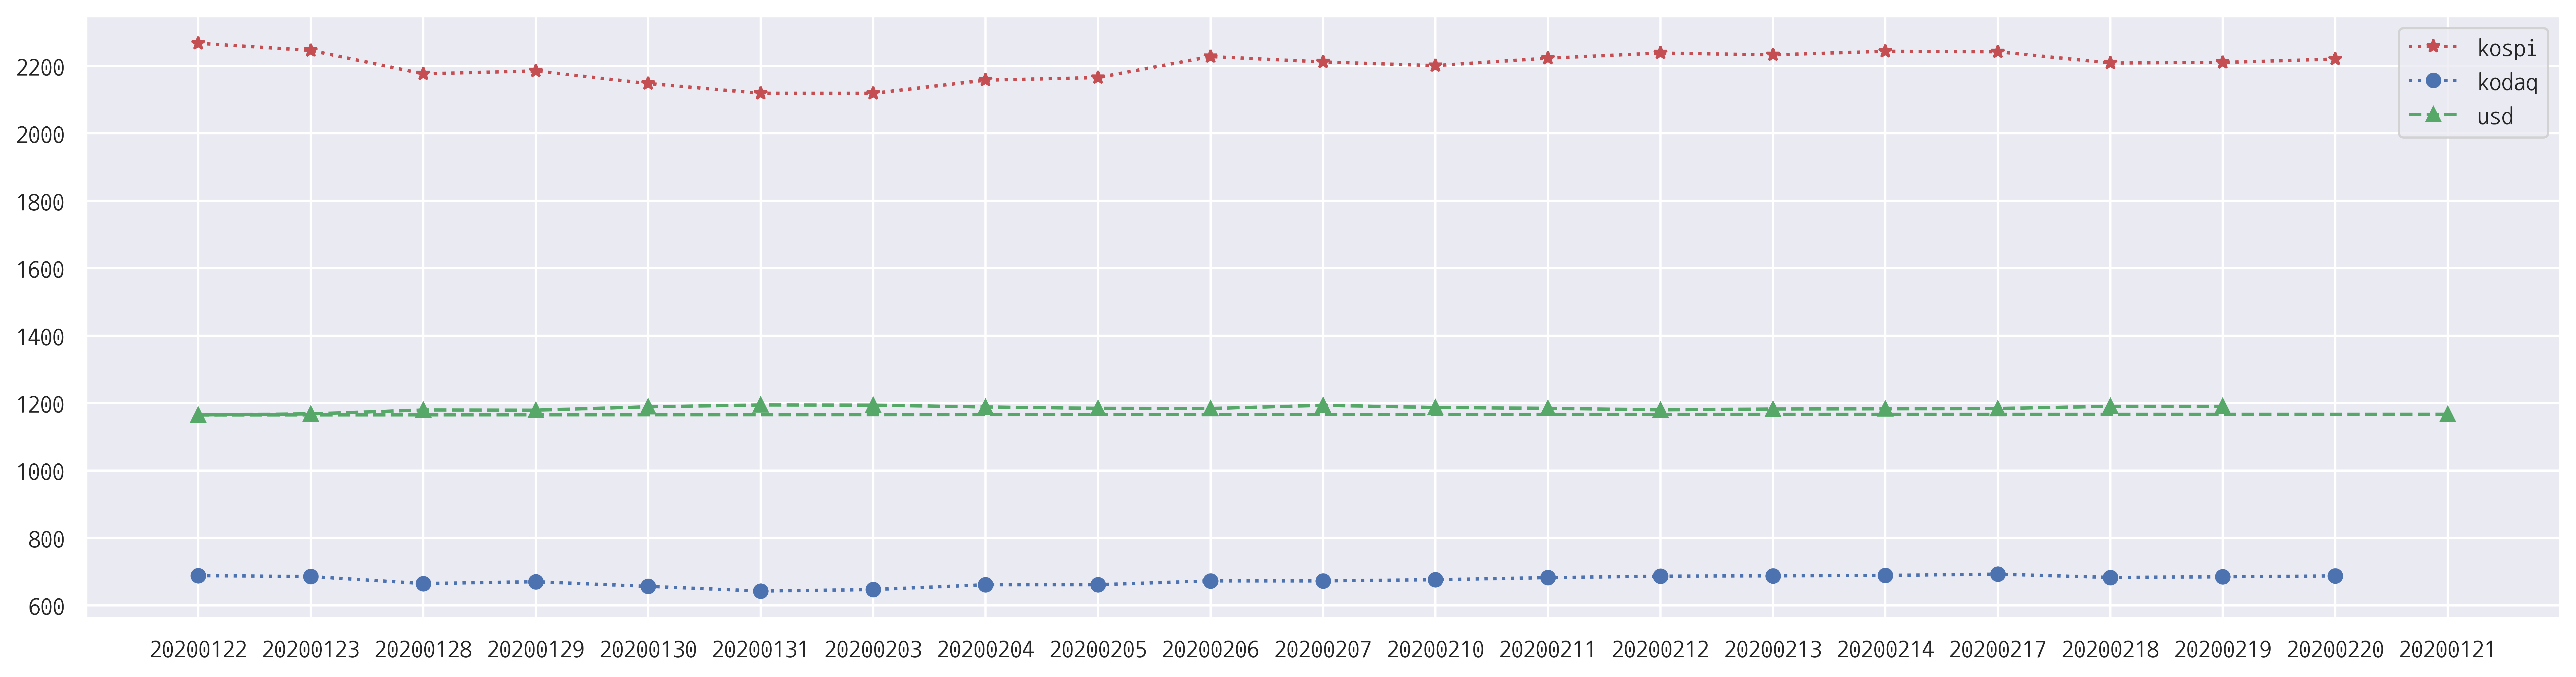

In [115]:
# 코스피 종가 그리기
plt.figure(figsize=(20,5))
plt.plot(kospi_df[::-1]['dt'], kospi_df[::-1]['ncv'], 'r*:', label = 'kospi')
plt.plot(kosdaq_df[::-1]['dt'], kosdaq_df[::-1]['ncv'], 'bo:',label = 'kodaq')
plt.plot(usd_df[::-1]['dt'], usd_df[::-1]['nv'], 'g^--',label = 'usd')
plt.legend(loc = 0)
plt.show()

### 정규화 : Nomalization
- $z = (x - min(x)) / (max(x) - min(x))$

In [117]:
from sklearn import preprocessing

In [120]:
preprocessing.minmax_scale(kosdaq_df[::-1]['ncv'])

array([0.91339054, 0.8599082 , 0.44342447, 0.55278388, 0.2775893 ,
       0.        , 0.08720814, 0.37437637, 0.37597286, 0.60287368,
       0.60167631, 0.67032528, 0.79545001, 0.88026342, 0.90061864,
       0.92656156, 1.        , 0.80702455, 0.84414289, 0.89503093])

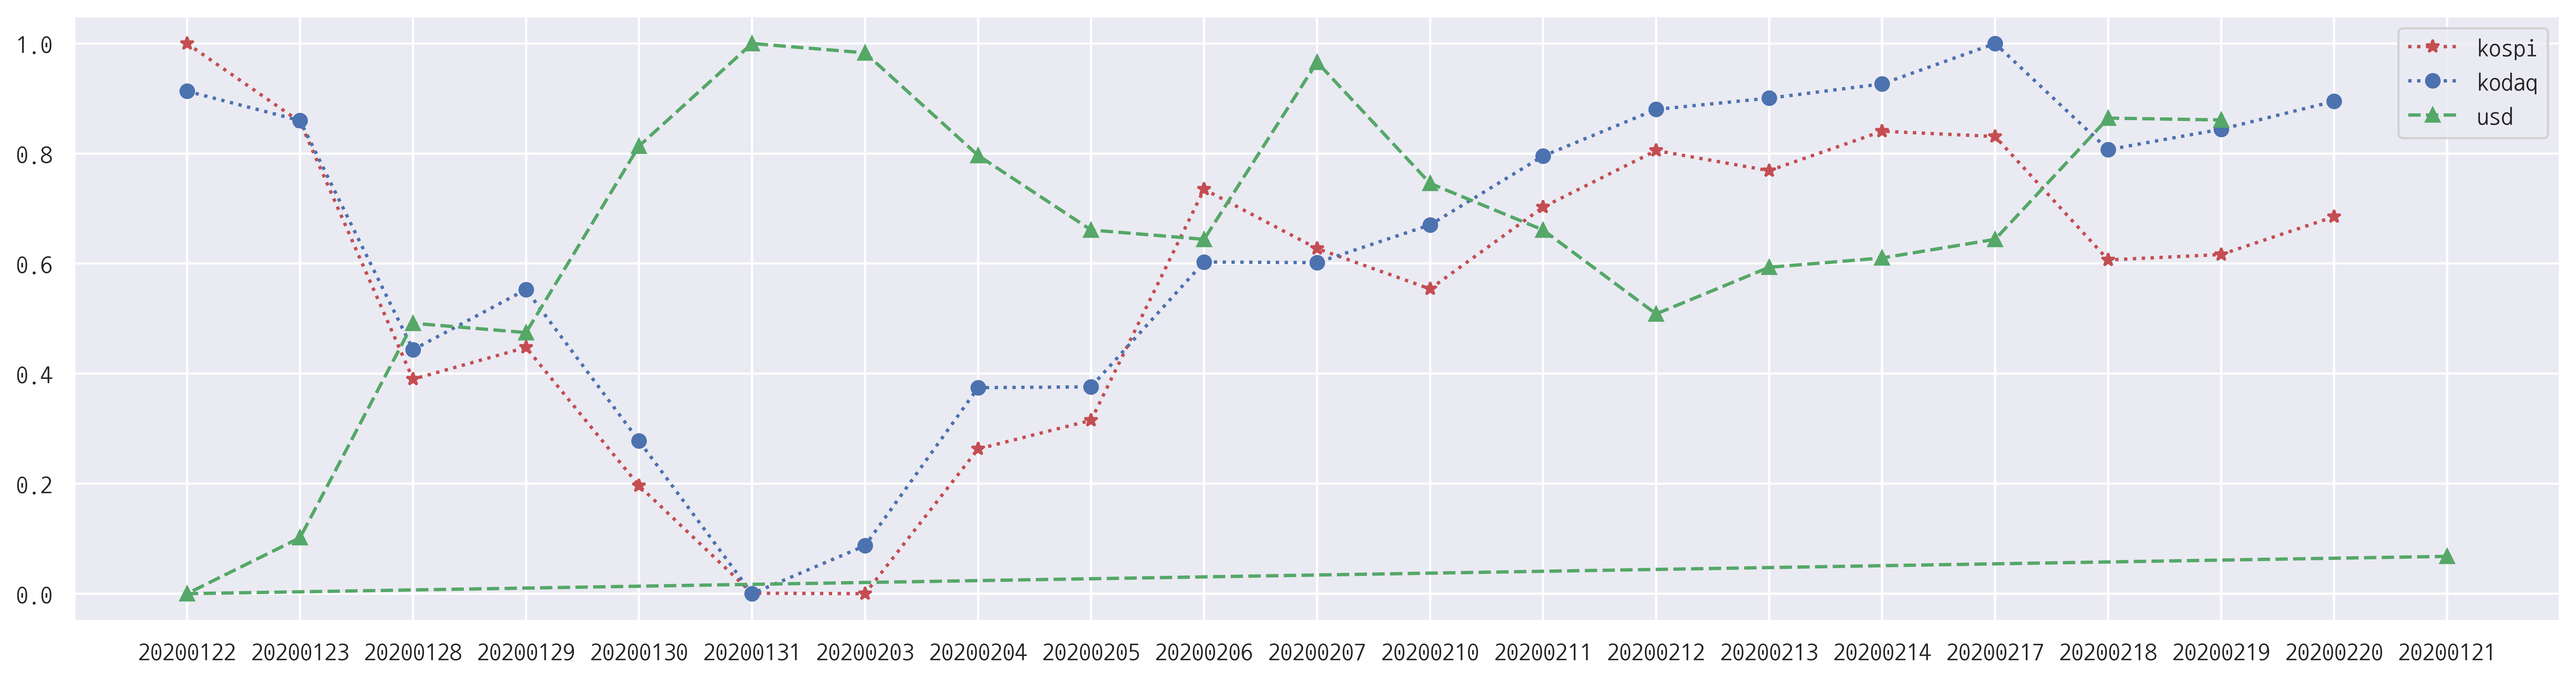

In [122]:
# 정규화하여 코스피 종가 그리기
plt.figure(figsize=(20,5))
plt.plot(kospi_df[::-1]['dt'], preprocessing.minmax_scale(kospi_df[::-1]['ncv']), 'r*:', label = 'kospi')
plt.plot(kosdaq_df[::-1]['dt'], preprocessing.minmax_scale(kosdaq_df[::-1]['ncv']), 'bo:',label = 'kodaq')
plt.plot(usd_df[::-1]['dt'], preprocessing.minmax_scale(usd_df[::-1]['nv']), 'g^--',label = 'usd')
plt.legend(loc = 0)
plt.show()

In [123]:
# 상관계수 구하기

In [125]:
np.corrcoef(kospi_df['ncv'], kosdaq_df['ncv'])[0,1]

0.9492884012873833

In [129]:
np.corrcoef(kospi_df['ncv'], usd_df['nv'])[0,1]

-0.43979673235488226

In [130]:
np.corrcoef(kosdaq_df['ncv'], usd_df['nv'])[0,1]

-0.29751779589087074